In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
path = "/content/drive/MyDrive/Adaboost/Adult.csv"

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


<h3> Reading the data and dummifying the categorical variables </h3>

In [13]:

adult_df1 = pd.read_csv(path)
adult_df = pd.get_dummies(adult_df1, columns = ['race','sex','workclass','marital-status'],drop_first = True)

In [5]:
adult_df.head()

,income,age,education-num,capital-gain,capital-loss,hours-per-week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,workclass_Never-worked,workclass_Private,workclass_Self,marital-status_Married,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,<=50K.,39,13,2174,0,40,0,0,0,1,1,0,0,0,0,1,0,0
1,>50K.,30,13,0,0,40,1,0,0,0,1,0,0,0,1,0,0,0
2,<=50K.,35,5,0,0,40,0,1,0,0,1,0,0,0,1,0,0,0
3,>50K.,56,13,0,0,40,0,0,0,1,1,0,0,0,1,0,0,0
4,<=50K.,23,12,0,0,52,0,0,0,1,1,0,0,0,0,1,0,0


<h3> Constructing the predictor and the target variables </h3>

In [6]:
X = adult_df.iloc[:,1:]
y = adult_df.iloc[:,0]

In [7]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,workclass_Never-worked,workclass_Private,workclass_Self,marital-status_Married,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,13,2174,0,40,0,0,0,1,1,0,0,0,0,1,0,0
1,30,13,0,0,40,1,0,0,0,1,0,0,0,1,0,0,0
2,35,5,0,0,40,0,1,0,0,1,0,0,0,1,0,0,0
3,56,13,0,0,40,0,0,0,1,1,0,0,0,1,0,0,0
4,23,12,0,0,52,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23587,65,7,6418,0,35,0,0,0,1,1,0,0,1,1,0,0,0
23588,53,13,7688,0,20,1,0,0,0,1,0,0,1,1,0,0,0
23589,30,10,0,0,25,0,0,0,1,1,0,0,1,0,1,0,0
23590,41,9,0,0,62,0,0,0,1,1,0,0,1,1,0,0,0


In [8]:
y

0        <=50K.
1         >50K.
2        <=50K.
3         >50K.
4        <=50K.
          ...  
23587     >50K.
23588     >50K.
23589    <=50K.
23590    <=50K.
23591    <=50K.
Name: income, Length: 23592, dtype: object

<h3> Checking Correlation among variables </h3>

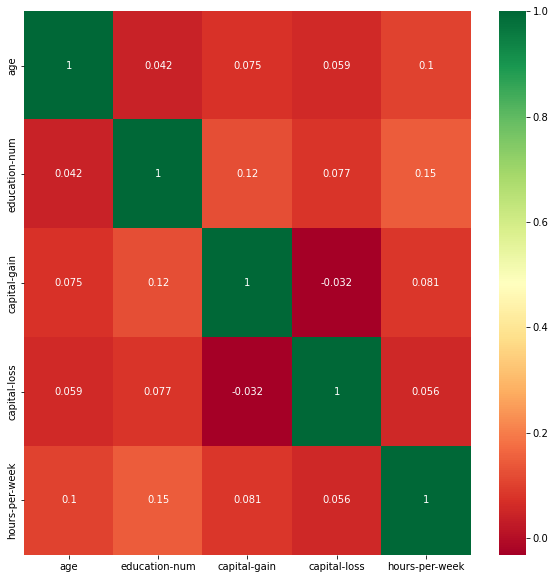

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = adult_df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(adult_df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<h3> Splitting the data into training and test set</h3>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=5)

<h3>AdaBoostClassifier with RandomForestClassifier as default model </h3>

In [ ]:
clf = AdaBoostClassifier(random_state=5,base_estimator=RandomForestClassifier(random_state=5),n_estimators=100,learning_rate=0.01)

In [ ]:
model = clf.fit(X_train,y_train)

In [ ]:
y_test_pred = model.predict(X_test)       

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)    
precision = precision_score(y_test,y_test_pred,pos_label='>50K.')
recall = recall_score(y_test,y_test_pred,pos_label='>50K.')
f1 = f1_score(y_test,y_test_pred,pos_label='>50K.')

In [ ]:
print(accuracy)

0.840226046750578


<h3>Tuning the n_estimators and learning_rate hyperparameters for Adaboost with Logistic Regression as the base model </h3>

In [ ]:
print("n_estimator \t\t learning_rate \t\t accuracy\t\t precision\t\t recall\t\t f1_score")
lr_final=[]
for n_estimators in [50,100,150,200]:
  lr=[]
  for learning_rate in [0.01,0.05,0.1,0.25,0.5]:
    clf2 = AdaBoostClassifier(random_state=5,base_estimator=LogisticRegression(random_state=5,max_iter=500),n_estimators=n_estimators,learning_rate=learning_rate)
    model_2 = clf2.fit(X_train,y_train)
    y_test_pred = model_2.predict(X_test)   
    accuracy = accuracy_score(y_test, y_test_pred)    
    lr.append(accuracy)
    precision = precision_score(y_test,y_test_pred,pos_label='>50K.')
    recall = recall_score(y_test,y_test_pred,pos_label='>50K.')
    f1 = f1_score(y_test,y_test_pred,pos_label='>50K.')
    print(str(n_estimators)+"\t\t\t "+str(round(learning_rate,3))+"\t\t\t "+str(round(accuracy,3))+"\t\t\t "+str(round(precision,3))+"\t\t\t "+str(round(recall,3))+"\t\t "+str(round(f1,3)))
  lr_final.append(lr)

n_estimator 		 learning_rate 		 accuracy		 precision		 recall		 f1_score
50			 0.01			 0.806			 0.755			 0.327		 0.456
50			 0.05			 0.812			 0.78			 0.343		 0.477
50			 0.1			 0.817			 0.778			 0.371		 0.502
50			 0.25			 0.831			 0.77			 0.458		 0.574
50			 0.5			 0.831			 0.745			 0.494		 0.594
100			 0.01			 0.808			 0.762			 0.337		 0.468
100			 0.05			 0.818			 0.779			 0.376		 0.507
100			 0.1			 0.828			 0.776			 0.437		 0.559
100			 0.25			 0.832			 0.744			 0.499		 0.597
100			 0.5			 0.836			 0.743			 0.524		 0.615
150			 0.01			 0.808			 0.764			 0.334		 0.465
150			 0.05			 0.823			 0.78			 0.406		 0.534
150			 0.1			 0.832			 0.763			 0.472		 0.583
150			 0.25			 0.835			 0.743			 0.52		 0.612
150			 0.5			 0.835			 0.738			 0.527		 0.615
200			 0.01			 0.811			 0.776			 0.342		 0.475
200			 0.05			 0.828			 0.779			 0.435		 0.558
200			 0.1			 0.831			 0.749			 0.487		 0.59
200			 0.25			 0.835			 0.74			 0.524		 0.613
200			 0.5			 0.836			 0.738			 0.529		 0.616


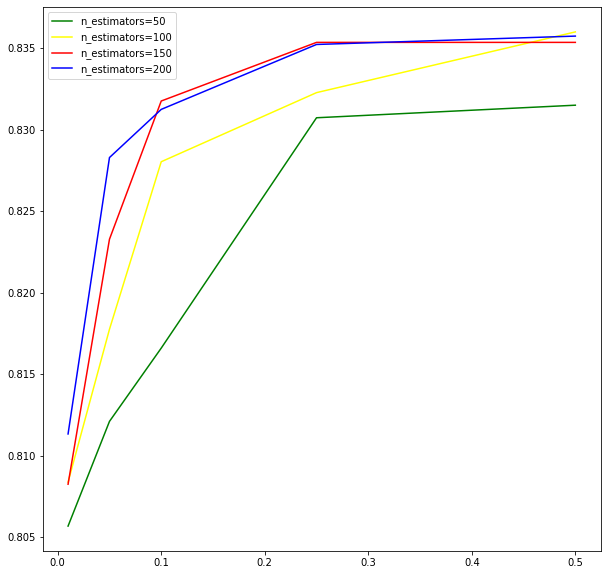

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[0],color='green', label="n_estimators=50")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[2],color='red', label="n_estimators=150")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[3],color='blue', label="n_estimators=200")
plt.legend()
plt.show()

<h3> Find the optimal max depth for DecisionTreeClassifier using 5-fold cross-validation</h3>

In [ ]:
lr=[]
for i in range (2,21):                                                 
    model_2 = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=model_2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))
    depth= i
    lr.append(np.average(scores))

2 : 0.823202802053625
3 : 0.8387590828378528
4 : 0.8424468167386971
5 : 0.8431673083682796
6 : 0.846685523809883
7 : 0.8472789956199721
8 : 0.8490169573255628
9 : 0.8459225604895957
10 : 0.8443966338490212
11 : 0.8425315894428383
12 : 0.8405394533530492
13 : 0.8379538993512557
14 : 0.8363856986462868
15 : 0.8326134255996678
16 : 0.828925646783753
17 : 0.8253226945700645
18 : 0.8262124621175067
19 : 0.8218468520060103
20 : 0.8208294537941153


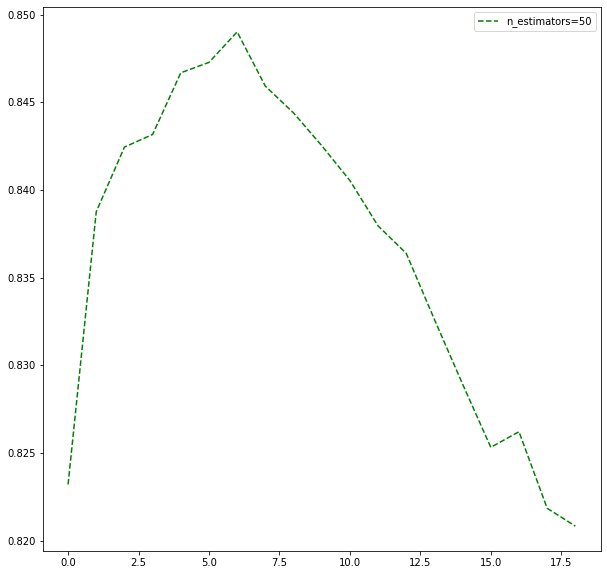

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(lr, 'g--', label="n_estimators=50")
plt.legend()
plt.show()

<h3> Tune n_estimators and learning_rate hyperparameters for Adaboost with Decision Tree as the base model</h3>

In [ ]:
print("n_estimator \t\t learning_rate \t\t accuracy \t\t precision \t\t recall \t\t f1_score")
lr_final=[]
for n_estimators in [50,100,150,200]:
  lr=[]
  for learning_rate in [0.01,0.05,0.1,0.25,0.5]:
    clf2 = AdaBoostClassifier(random_state=5,base_estimator=DecisionTreeClassifier(random_state=5,max_depth=8),n_estimators=n_estimators,learning_rate=learning_rate)
    model_2 = clf2.fit(X_train,y_train)
    y_test_pred = model_2.predict(X_test)   
    accuracy = accuracy_score(y_test, y_test_pred) 
    lr.append(accuracy) 
    precision = precision_score(y_test,y_test_pred,pos_label='>50K.')
    recall = recall_score(y_test,y_test_pred,pos_label='>50K.')
    f1 = f1_score(y_test,y_test_pred,pos_label='>50K.')
    print(str(n_estimators)+"\t\t\t "+str(round(learning_rate,3))+"\t\t\t "+str(round(accuracy,3))+"\t\t\t "+str(round(precision,3))+"\t\t\t "+str(round(recall,3))+"\t\t\t "+str(round(f1,3)))
  lr_final.append(lr)

n_estimator 		 learning_rate 		 accuracy 		 precision 		 recall 		 f1_score
50			 0.01			 0.847			 0.773			 0.549			 0.642
50			 0.05			 0.848			 0.749			 0.59			 0.66
50			 0.1			 0.845			 0.741			 0.585			 0.654
50			 0.25			 0.84			 0.72			 0.586			 0.646
50			 0.5			 0.827			 0.684			 0.571			 0.623
100			 0.01			 0.846			 0.76			 0.561			 0.646
100			 0.05			 0.847			 0.739			 0.597			 0.661
100			 0.1			 0.84			 0.721			 0.582			 0.644
100			 0.25			 0.833			 0.694			 0.59			 0.637
100			 0.5			 0.83			 0.682			 0.595			 0.635
150			 0.01			 0.849			 0.765			 0.571			 0.654
150			 0.05			 0.842			 0.724			 0.595			 0.653
150			 0.1			 0.834			 0.703			 0.582			 0.637
150			 0.25			 0.83			 0.686			 0.587			 0.633
150			 0.5			 0.826			 0.671			 0.594			 0.63
200			 0.01			 0.851			 0.762			 0.584			 0.661
200			 0.05			 0.84			 0.713			 0.601			 0.652
200			 0.1			 0.831			 0.696			 0.576			 0.63
200			 0.25			 0.831			 0.687			 0.59			 0.635
200			 0.5			 0.824			 0.669			 0.579

We want a balanced precision and recall  along with accuravy. Hence, we choose n_estimators as 150 and learning rate as 0.01

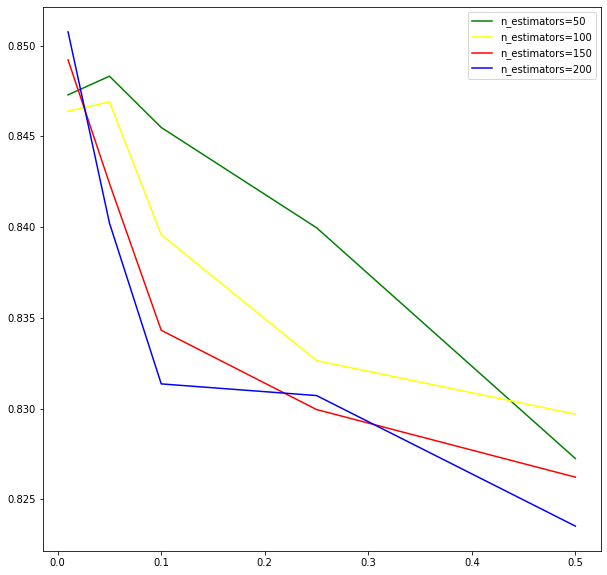

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[0],color='green', label="n_estimators=50")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[2],color='red', label="n_estimators=150")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[3],color='blue', label="n_estimators=200")
plt.legend()
plt.show()

In [ ]:
clf2 = AdaBoostClassifier(random_state=5,base_estimator=DecisionTreeClassifier(random_state=5,max_depth=8),n_estimators=200,learning_rate=0.01)

In [ ]:
model_2 = clf2.fit(X_train,y_train)
y_test_pred = model_2.predict(X_test)     
accuracy_cart = accuracy_score(y_test, y_test_pred) 
print(accuracy_cart)

0.8507577703570511


<h3>Comparison - Adaboost vs Gradient Boosting </h3>

In [ ]:
clf_gradient_boosting = GradientBoostingClassifier(n_estimators=100)
clf_gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = clf_gradient_boosting.predict(X_test)
accuracy_score(y_test, y_pred_gradient_boosting)

0.8596198304649371

In [ ]:
print("n_estimator \t\t learning_rate \t\t accuracy \t\t precision \t\t recall \t\t f1_score")
lr_final=[]
for n_estimators in [50,100,150,200]:
  lr=[]
  for learning_rate in [0.01,0.05,0.1,0.25,0.5]:
    clf_gradient_boosting = GradientBoostingClassifier(random_state=5,n_estimators=n_estimators,learning_rate=learning_rate)
    model_gradient_boosting = clf_gradient_boosting.fit(X_train,y_train)
    y_test_pred_boosting = model_gradient_boosting.predict(X_test)   
    accuracy = accuracy_score(y_test, y_test_pred_boosting)    
    lr.append(accuracy) 
    precision = precision_score(y_test,y_test_pred_boosting,pos_label='>50K.')
    recall = recall_score(y_test,y_test_pred_boosting,pos_label='>50K.')
    f1 = f1_score(y_test,y_test_pred_boosting,pos_label='>50K.')
    print(str(n_estimators)+"\t\t\t "+str(round(learning_rate,3))+"\t\t\t "+str(round(accuracy,3))+"\t\t\t "+str(round(precision,3))+"\t\t\t "+str(round(recall,3))+"\t\t\t "+str(round(f1,3)))
  lr_final.append(lr)

n_estimator 		 learning_rate 		 accuracy 		 precision 		 recall 		 f1_score
50			 0.01			 0.796			 0.984			 0.185			 0.312
50			 0.05			 0.846			 0.803			 0.505			 0.62
50			 0.1			 0.851			 0.808			 0.529			 0.639
50			 0.25			 0.86			 0.8			 0.586			 0.677
50			 0.5			 0.863			 0.798			 0.602			 0.687
100			 0.01			 0.81			 0.977			 0.242			 0.388
100			 0.05			 0.852			 0.812			 0.528			 0.64
100			 0.1			 0.86			 0.805			 0.577			 0.672
100			 0.25			 0.862			 0.802			 0.595			 0.683
100			 0.5			 0.863			 0.795			 0.61			 0.69
150			 0.01			 0.843			 0.807			 0.486			 0.607
150			 0.05			 0.856			 0.805			 0.559			 0.66
150			 0.1			 0.861			 0.807			 0.582			 0.676
150			 0.25			 0.864			 0.8			 0.606			 0.69
150			 0.5			 0.864			 0.793			 0.615			 0.693
200			 0.01			 0.846			 0.807			 0.503			 0.62
200			 0.05			 0.858			 0.805			 0.568			 0.666
200			 0.1			 0.863			 0.802			 0.596			 0.684
200			 0.25			 0.865			 0.801			 0.612			 0.694
200			 0.5			 0.863			 0.789			 0.616	

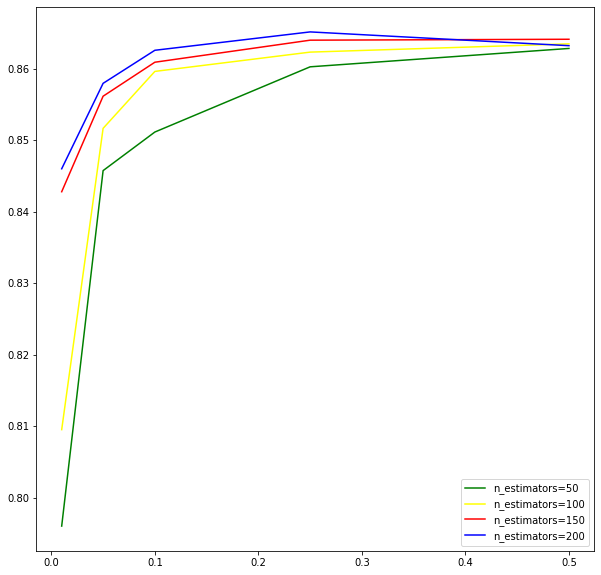

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[0],color='green', label="n_estimators=50")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[2],color='red', label="n_estimators=150")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[3],color='blue', label="n_estimators=200")
plt.legend()
plt.show()